# Imports

In [23]:
import re

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import plotly.express as px
from git_root import git_root

import nltk

In [24]:
my_git_root = git_root()

In [25]:
df_extracted_path = f'{my_git_root}/data/output/documents.csv'
df_extracted = pd.read_csv(df_extracted_path)

In [26]:
df_extracted

,name,text
0,aalto-university.md,# Aalto University \n\n## Aalto University Re...
1,aberystwyth-university.md,# Research Data Management Policy \n\nVersion...
2,aston-university.md,# Research Data Management Policy \n\nJuly 20...
3,bangor-university.md,# Data Protection Policy \n\n<html><body><tab...
4,brunel-university-london.md,# Brunel University Research Data Management P...
...,...,...
137,universität-rostock.md,# Research Data Policy of the University of Ro...
138,universität-siegen.md,# Research-Data-Policy of the University of Si...
139,universität-stuttgart.md,# Research data management policy of the Unive...
140,utrecht-university.md,# University policy framework for research dat...


In [27]:
documents = df_extracted['text']
documents_words = [nltk.word_tokenize(document) for document in documents]
num_documents_words = [len(document) for document in documents_words]

In [40]:
documents_sents = [nltk.sent_tokenize(document) for document in documents]
num_documents_sents = [len(document) for document in documents_sents]

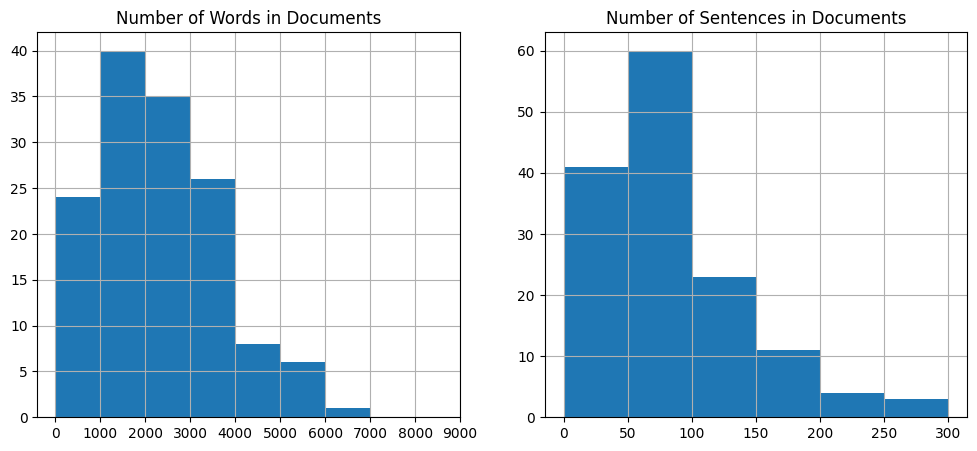

In [57]:
fig, ax = plt.subplots(1, 2, figsize = (12,5))

ax[0].hist(num_documents_words, bins=np.arange(0, np.max(num_documents_words) + 100, 1000))
ax[0].set_xticks(np.arange(0, np.max(num_documents_words) + 1000, 1000))
ax[0].grid()
ax[0].set_title('Number of Words in Documents')

ax[1].hist(num_documents_sents, bins=np.arange(0, np.max(num_documents_sents) + 50, 50))
ax[1].set_xticks(np.arange(0, np.max(num_documents_sents) + 50, 50))
ax[1].grid()
ax[1].set_title('Number of Sentences in Documents')

plt.savefig(f'{my_git_root}/notebooks/images/document_statistics/num_words.svg')
plt.show()

(array([24., 28., 38., 27., 10.,  6.,  4.,  3.,  0.,  2.]),
 array([ 137. ,  943.4, 1749.8, 2556.2, 3362.6, 4169. , 4975.4, 5781.8,
        6588.2, 7394.6, 8201. ]),
 <BarContainer object of 10 artists>)

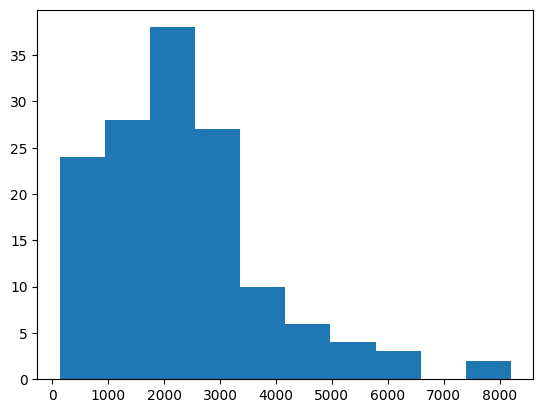

In [29]:
plt.hist(num_documents_words)